# Regression Project

In [110]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read DataFrame

In [111]:
missing_value = {''}
df = pd.read_csv('housePrice.csv', na_values= missing_value)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


## Data Exploration
Let's first have a descriptive exploration on our data.


In [112]:
# summarize the data
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Time To Clean The Dataset

In [113]:
# drop the rows which contain at least one Nan value
df.dropna(axis= 0, inplace= True, how= "any")
  
# convert to a appropriate data type
df['Area'] = df['Area'].str.replace(',', '')
df = df.astype({'Area': 'float'})

# drop the rows which have an non-regular Area!
index_names = df[(df['Area'] >= 10000)].index
df.drop(index_names, inplace = True)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


### Let's plot Price with respect to Area


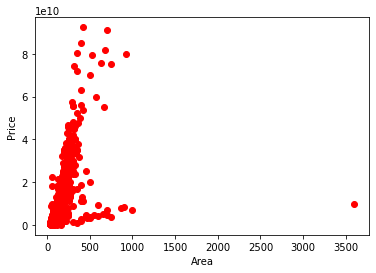

In [114]:
plt.scatter(df.Area, df.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

##### Let's change some features' value from string into int to explore more.


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3452 non-null   float64
 1   Room        3452 non-null   int64  
 2   Parking     3452 non-null   bool   
 3   Warehouse   3452 non-null   bool   
 4   Elevator    3452 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price       3452 non-null   float64
 7   Price(USD)  3452 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.9+ KB


In [116]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include= 'object') 
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Address']

In [117]:
categoricals = ['Address']

for col in categoricals:
    print(col)
    print(df[col].unique())

Address
['Shahran' 'Pardis' 'Shahrake Qods' 'Shahrake Gharb'
 'North Program Organization' 'Andisheh' 'West Ferdows Boulevard' 'Narmak'
 'Saadat Abad' 'Zafar' 'Islamshahr' 'Pirouzi' 'Shahrake Shahid Bagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'Southern Janatabad' 'Salsabil'
 'Zargandeh' 'Feiz Garden' 'Water Organization' 'ShahrAra' 'Gisha' 'Ray'
 'Abbasabad' 'Ostad Moein' 'Farmanieh' 'Parand' 'Punak' 'Qasr-od-Dasht'
 'Aqdasieh' 'Pakdasht' 'Railway' 'Central Janatabad'
 'East Ferdows Boulevard' 'Pakdasht KhatunAbad' 'Sattarkhan' 'Baghestan'
 'Shahryar' 'Northern Janatabad' 'Daryan No'
 'Southern Program Organization' 'Rudhen' 'West Pars' 'Afsarieh'
 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh' 'Baqershahr' 'Jeyhoon'
 'Lavizan' 'Shams Abad' 'Fatemi' 'Keshavarz Boulevard' 'Kahrizak'
 'Qarchak' 'Northren Jamalzadeh' 'Azarbaijan' 'Bahar'
 'Persian Gulf Martyrs Lake' 'Beryanak' 'Heshmatieh' 'Elm-o-Sanat'
 'Golestan' 'Shahr-e-Ziba' 'Pasdaran' 'Chardivari' 'Gheitarieh'
 'Kamranieh' 'Gholhak'

In [118]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Room'])
df.drop("Room", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Room'
df["Room"] = label

# Just like the last part but for other columns
label = le.fit_transform(df['Parking'])
df.drop("Parking", axis=1, inplace=True)
df["Parking"] = label

label = le.fit_transform(df['Warehouse'])
df.drop("Warehouse", axis=1, inplace=True)
df["Warehouse"] = label

label = le.fit_transform(df['Elevator'])
df.drop("Elevator", axis=1, inplace=True)
df["Elevator"] = label

label = le.fit_transform(df['Address'])
df.drop("Address", axis=1, inplace=True)
df["Address"] = label

first_column = df.pop('Price')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(7, 'Price', first_column)

df


,Area,Price(USD),Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,61666.67,1,1,1,1,156,1.850000e+09
1,60.0,61666.67,1,1,1,1,156,1.850000e+09
2,79.0,18333.33,2,1,1,1,117,5.500000e+08
3,95.0,30083.33,2,1,1,1,152,9.025000e+08
4,123.0,233333.33,2,1,1,1,150,7.000000e+09
...,...,...,...,...,...,...,...,...
3474,86.0,116666.67,2,1,1,1,163,3.500000e+09
3475,83.0,226666.67,2,1,1,1,105,6.800000e+09
3476,75.0,12166.67,2,0,0,0,115,3.650000e+08
3477,105.0,186666.67,2,1,1,1,39,5.600000e+09


We can plot each of these features:


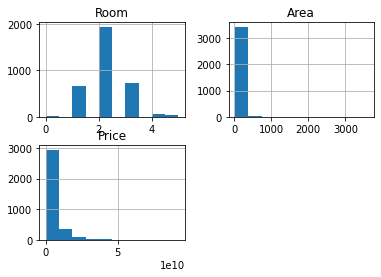

In [119]:
viz = df[['Room', 'Area', 'Price']]
viz.hist()
plt.show()

### Let's plot Price with respect to Location


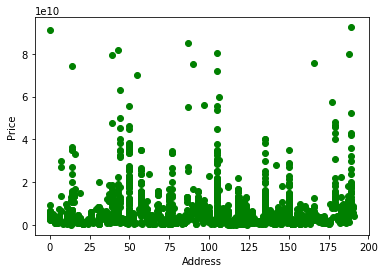

In [120]:
plt.scatter(df.Address, df.Price,  color='green')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

### Normalizing The Data

In [121]:
# column =  ['Area', 'Parking', 'Address', 'Price']
# df[column] = df[column] /df[column].abs().max()

##### Let's select some features to explore more.


## Creating train and test dataset

In [122]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [123]:
from sklearn.preprocessing import StandardScaler #Importing the lib to Standard scaler the values
scaler_student = StandardScaler() #Creating the variaable to StandardScaler

In [138]:
standard = scaler_student.fit_transform(X) #Standarding values on the X variable
standard = pd.DataFrame(standard, columns = X.columns)
standard

,Area,Price(USD),Room,Parking,Warehouse,Elevator,Address
0,-0.487353,-0.434247,-1.422726,0.424465,0.305118,0.520114,1.013598
1,-0.519708,-0.434247,-1.422726,0.424465,0.305118,0.520114,1.013598
2,-0.314793,-0.594291,-0.106743,0.424465,0.305118,0.520114,0.238608
3,-0.142233,-0.550895,-0.106743,0.424465,0.305118,0.520114,0.934112
4,0.159748,0.199773,-0.106743,0.424465,0.305118,0.520114,0.894368
...,...,...,...,...,...,...,...
3447,-0.239298,-0.231115,-0.106743,0.424465,0.305118,0.520114,1.152698
3448,-0.271653,0.175151,-0.106743,0.424465,0.305118,0.520114,0.000150
3449,-0.357933,-0.617067,-0.106743,-2.355904,-3.277422,-1.922654,0.198865
3450,-0.034383,0.027418,-0.106743,0.424465,0.305118,0.520114,-1.311371


## Modeling

Using sklearn package to model data.


In [139]:
train, test, target, y_test = train_test_split( x_student, y, test_size=0.2, random_state=4)

<IPython.core.display.Javascript object>

In [140]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train, target)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 5.56226554e+00  8.12276968e+09 -1.05546951e+00  1.60549998e+00
  2.01982212e+00  1.25376785e+00 -2.36007190e+00]


## Prediction

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test , regr.predict(test))

0.9999999999999999